# Exploratory Analysis of Used Automobile Dataset

In [1]:
#First I import all the essential libraries
import numpy as np
import pandas as pd
import datetime
import math
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
#Now input the used car dataset
training_data = pd.read_csv('C:/Users/Abhishek Nagrecha/Desktop/input/train-data.csv')
testing_data = pd.read_csv('C:/Users/Abhishek Nagrecha/Desktop/input/test-data.csv')

In [3]:
#This is our training data information
training_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         6019 non-null   int64  
 1   Name               6019 non-null   object 
 2   Location           6019 non-null   object 
 3   Year               6019 non-null   int64  
 4   Kilometers_Driven  6019 non-null   int64  
 5   Fuel_Type          6019 non-null   object 
 6   Transmission       6019 non-null   object 
 7   Owner_Type         6019 non-null   object 
 8   Mileage            6017 non-null   object 
 9   Engine             5983 non-null   object 
 10  Power              5983 non-null   object 
 11  Seats              5977 non-null   float64
 12  New_Price          824 non-null    object 
 13  Price              6019 non-null   float64
dtypes: float64(2), int64(3), object(9)
memory usage: 658.5+ KB


In [4]:
training_data.head(4)

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00


In [5]:
training_data.tail(4)

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
6015,6015,Hyundai Xcent 1.1 CRDi S,Jaipur,2015,100000,Diesel,Manual,First,24.4 kmpl,1120 CC,71 bhp,5.0,NaN,4.00
6016,6016,Mahindra Xylo D4 BSIV,Jaipur,2012,55000,Diesel,Manual,Second,14.0 kmpl,2498 CC,112 bhp,8.0,NaN,2.90
6017,6017,Maruti Wagon R VXI,Kolkata,2013,46000,Petrol,Manual,First,18.9 kmpl,998 CC,67.1 bhp,5.0,NaN,2.65
6018,6018,Chevrolet Beat Diesel,Hyderabad,2011,47000,Diesel,Manual,First,25.44 kmpl,936 CC,57.6 bhp,5.0,NaN,2.50


In [6]:
training_data = training_data.iloc[:,1:]
training_data.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


In [7]:
training_data.describe()

,Year,Kilometers_Driven,Seats,Price
count,6019.000000,6.019000e+03,5977.000000,6019.000000
mean,2013.358199,5.873838e+04,5.278735,9.479468
std,3.269742,9.126884e+04,0.808840,11.187917
min,1998.000000,1.710000e+02,0.000000,0.440000
25%,2011.000000,3.400000e+04,5.000000,3.500000
50%,2014.000000,5.300000e+04,5.000000,5.640000
75%,2016.000000,7.300000e+04,5.000000,9.950000
max,2019.000000,6.500000e+06,10.000000,160.000000


In [8]:
training_data.shape

(6019, 13)

In [9]:
training_data['Kilometers_Driven'].value_counts()


60000    82
45000    70
65000    68
50000    61
70000    60
         ..
50446     1
54540     1
70920     1
75014     1
83969     1
Name: Kilometers_Driven, Length: 3093, dtype: int64

In [10]:
print(training_data['Name'].unique())
print(training_data['Location'].unique())
print(training_data['Fuel_Type'].unique())
print(training_data['Transmission'].unique())
print(training_data['Owner_Type'].unique())

['Maruti Wagon R LXI CNG' 'Hyundai Creta 1.6 CRDi SX Option'
 'Honda Jazz V' ... 'Volkswagen Polo IPL II 1.2 Petrol Highline'
 'Tata Bolt Revotron XT' 'Mahindra Xylo D4 BSIV']
['Mumbai' 'Pune' 'Chennai' 'Coimbatore' 'Hyderabad' 'Jaipur' 'Kochi'
 'Kolkata' 'Delhi' 'Bangalore' 'Ahmedabad']
['CNG' 'Diesel' 'Petrol' 'LPG' 'Electric']
['Manual' 'Automatic']
['First' 'Second' 'Fourth & Above' 'Third']


In [11]:
for i in range(training_data.shape[0]):
    training_data.at[i, 'Company'] = training_data['Name'][i].split()[0]

In [12]:
#Now here I am checking for the missing values in the dataset
training_data.isnull().sum()

Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 36
Power                  36
Seats                  42
New_Price            5195
Price                   0
Company                 0
dtype: int64

<AxesSubplot:xlabel='Kilometers_Driven', ylabel='Density'>

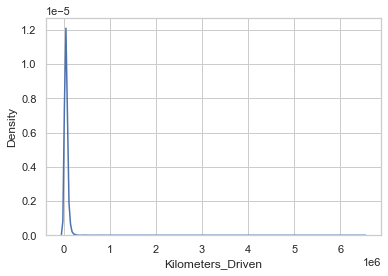

In [42]:
#KDE plots
sns.set_style("whitegrid")
sns.kdeplot(training_data['Kilometers_Driven'])

<AxesSubplot:xlabel='Seats', ylabel='Density'>

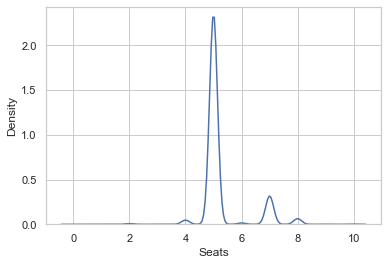

In [44]:
#KDE plots
sns.set_style("whitegrid")
sns.kdeplot(training_data['Seats'])

Text(0, 0.5, 'Seats')

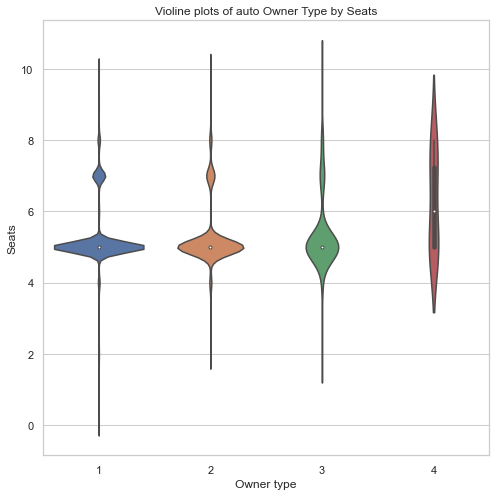

In [55]:
#iolin plot combines attributes of boxplots and a kernel density estimation plot

fig = plt.figure(figsize=(8,8)) # define plot area
ax = fig.gca() # define axis 
sns.set_style("whitegrid")
sns.violinplot(x = 'Owner_Type', y = 'Seats', data = training_data, ax = ax)
ax.set_title('Violine plots of auto Owner Type by Seats') # Give the plot a main title
ax.set_xlabel('Owner type') # Set text for the x axis
ax.set_ylabel('Seats')# Set text for y axis


Text(0, 0.5, 'Seats')

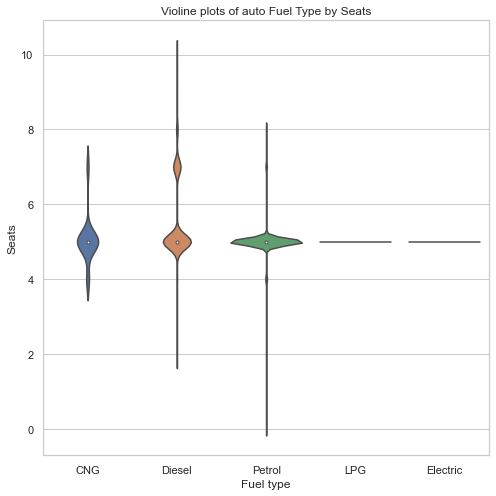

In [58]:
#iolin plot combines attributes of boxplots and a kernel density estimation plot

fig = plt.figure(figsize=(8,8)) # define plot area
ax = fig.gca() # define axis 
sns.set_style("whitegrid")
sns.violinplot(x = 'Fuel_Type', y = 'Seats', data = training_data, ax = ax)
ax.set_title('Violine plots of auto Fuel Type by Seats') # Give the plot a main title
ax.set_xlabel('Fuel type') # Set text for the x axis
ax.set_ylabel('Seats')# Set text for y axis


<AxesSubplot:xlabel='Owner_Type', ylabel='Seats'>

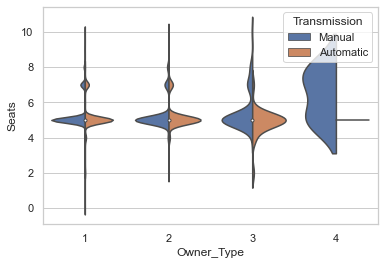

In [63]:
#Now we will explore the Split violin plot

import seaborn as sns
sns.set_style("whitegrid")
sns.violinplot(data = training_data, x = 'Owner_Type', y = 'Seats', hue="Transmission",  split=True)


<AxesSubplot:xlabel='Fuel_Type', ylabel='Seats'>

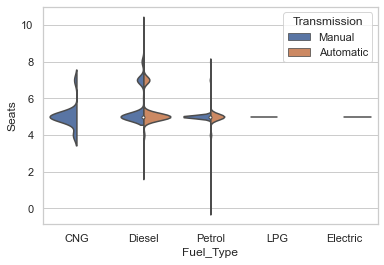

In [64]:
#Now we will explore the Split violin plot

import seaborn as sns
sns.set_style("whitegrid")
sns.violinplot(data = training_data, x = 'Fuel_Type', y = 'Seats', hue="Transmission",  split=True)



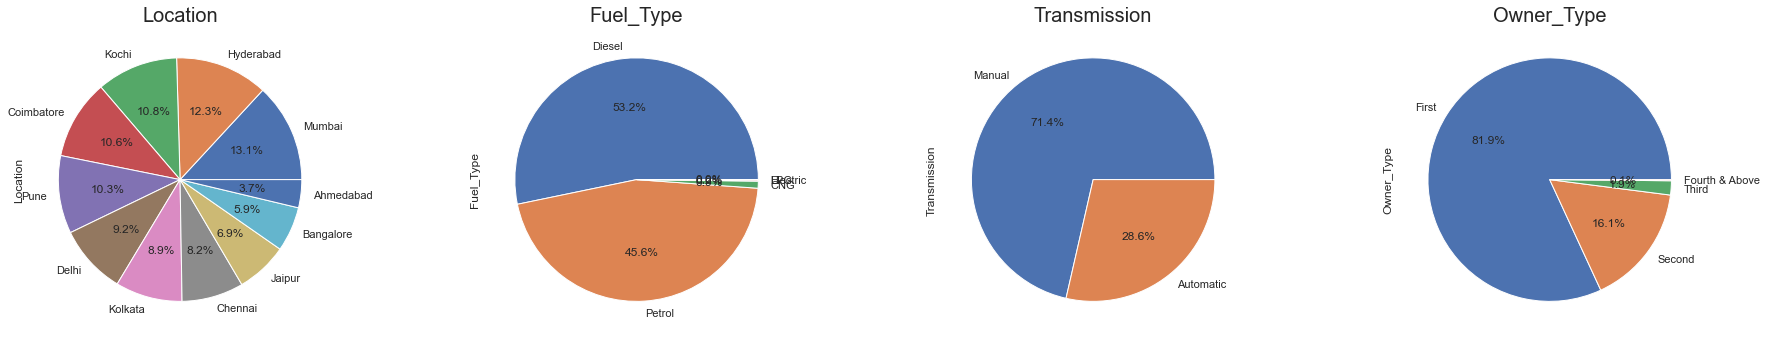

In [13]:
plt.figure(figsize=(30,20))
plt.subplots_adjust(left=0.125, bottom=0.1, right=0.9, top=0.9, wspace=0.5, hspace=0.2)

plt.subplot(141)
plt.title('Location',fontsize=20)
training_data['Location'].value_counts().plot.pie(autopct="%1.1f%%")

plt.subplot(142)
plt.title('Fuel_Type',fontsize=20)
training_data['Fuel_Type'].value_counts().plot.pie(autopct='%1.1f%%')

plt.subplot(143)
plt.title('Transmission',fontsize=20)
training_data['Transmission'].value_counts().plot.pie(autopct='%1.1f%%')

plt.subplot(144)
plt.title('Owner_Type',fontsize=20)
training_data['Owner_Type'].value_counts().plot.pie(autopct='%1.1f%%')
plt.show()

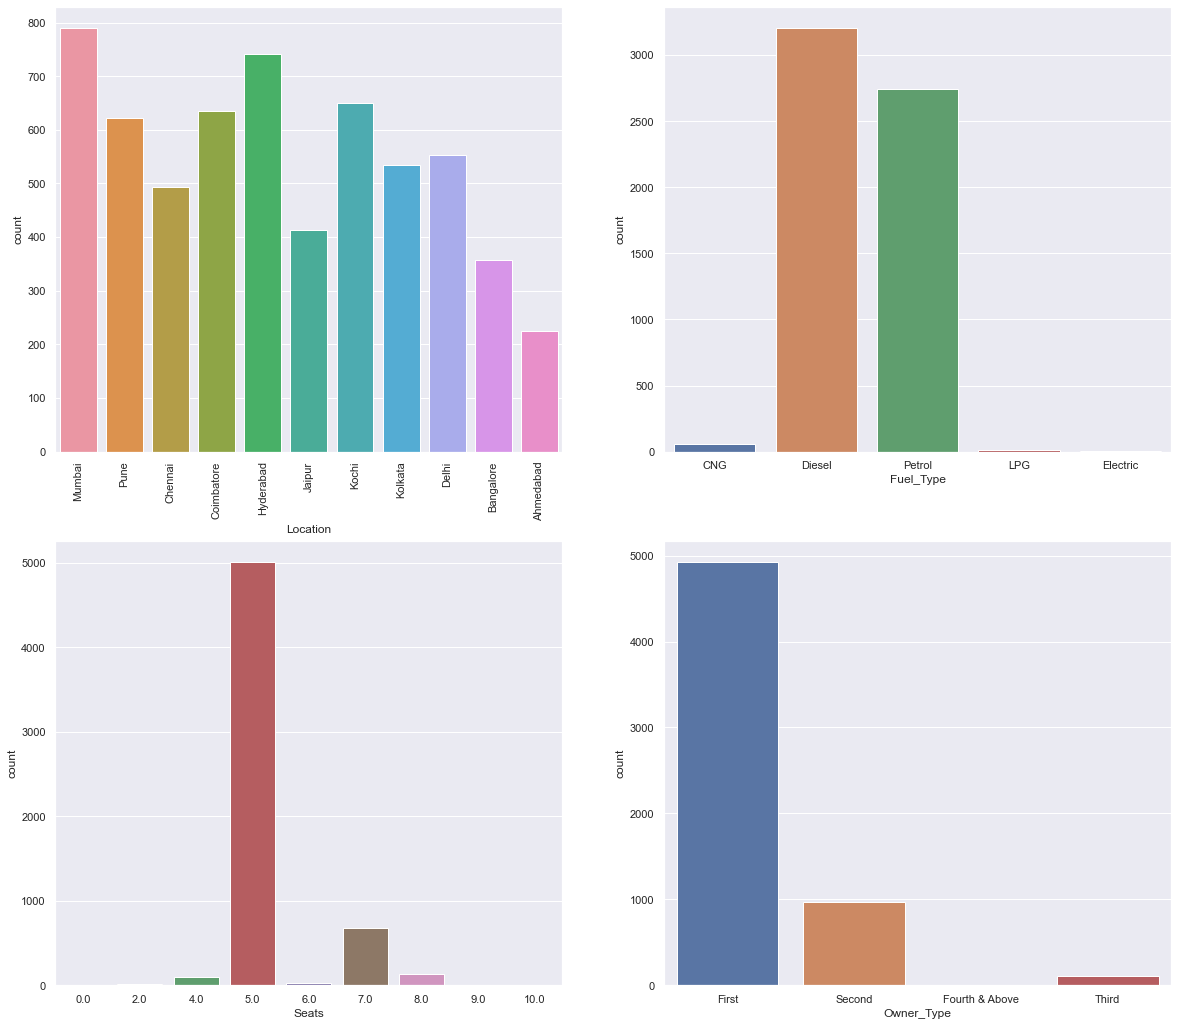

In [14]:
fig = plt.figure(figsize=(20,18))
fig.subplots_adjust(hspace=0.2, wspace=0.2)
fig.add_subplot(2,2,1)
g1 = sns.countplot(x='Location', data=training_data)
loc,labels = plt.xticks()
g1.set_xticklabels(labels,rotation=90)
fig.add_subplot(2,2,2)
g2 = sns.countplot(x='Fuel_Type', data=training_data)
loc,labels = plt.xticks()
g2.set_xticklabels(labels,rotation=0)
fig.add_subplot(2,2,3)
g3 = sns.countplot(x='Seats', data=training_data)
loc,labels = plt.xticks()
g3.set_xticklabels(labels,rotation=0)
fig.add_subplot(2,2,4)
g4 = sns.countplot(x='Owner_Type', data=training_data)
loc,labels = plt.xticks()
g4.set_xticklabels(labels,rotation=0)
plt.show()

In [15]:
training_data['Price'].describe()


count    6019.000000
mean        9.479468
std        11.187917
min         0.440000
25%         3.500000
50%         5.640000
75%         9.950000
max       160.000000
Name: Price, dtype: float64

<AxesSubplot:xlabel='Owner_Type'>

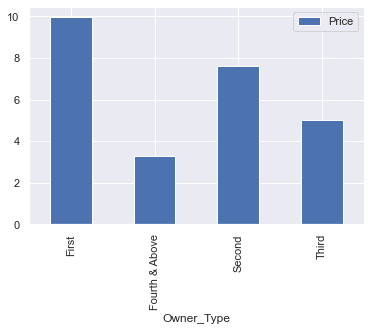

In [16]:
#Prices decreases progressively as ownership level increases
df_vis_1 = pd.DataFrame(training_data.groupby('Owner_Type')['Price'].mean())
df_vis_1.plot.bar()

<AxesSubplot:xlabel='Fuel_Type'>

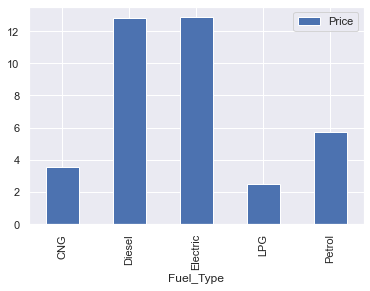

In [17]:
#Prices of used cars on the basis of different fuel types
df_vis_1 = pd.DataFrame(training_data.groupby('Fuel_Type')['Price'].mean())
df_vis_1.plot.bar()

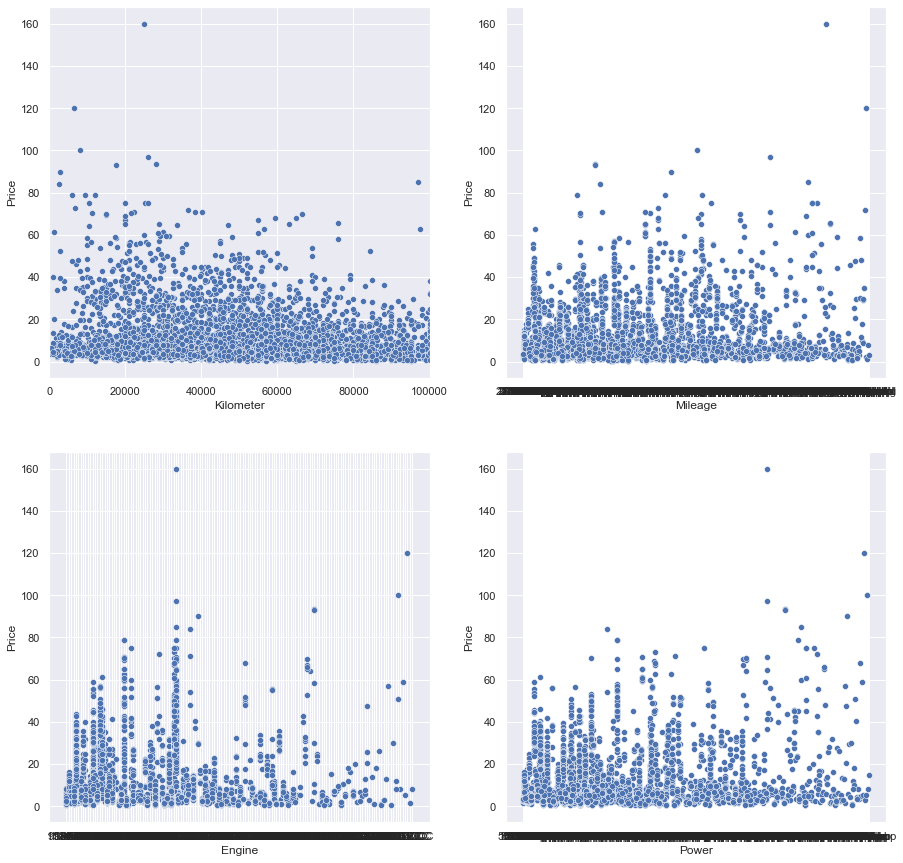

In [18]:
fig = plt.figure(figsize=(15,15))
fig.subplots_adjust(hspace=0.2, wspace=0.2)
ax1 = fig.add_subplot(2,2,1)
plt.xlim([0, 100000])
p1 = sns.scatterplot(x="Kilometers_Driven", y="Price", data=training_data)
loc, labels = plt.xticks()
ax1.set_xlabel('Kilometer')

ax2 = fig.add_subplot(2,2,2)
p2 = sns.scatterplot(x="Mileage", y="Price", data=training_data)
loc, labels = plt.xticks()
ax2.set_xlabel('Mileage')

ax3 = fig.add_subplot(2,2,3)
p3 = sns.scatterplot(x="Engine", y="Price", data=training_data)
loc, labels = plt.xticks()
ax3.set_xlabel('Engine')

ax4 = fig.add_subplot(2,2,4)
p4 = sns.scatterplot(x="Power", y="Price", data=training_data)
loc, labels = plt.xticks()
ax4.set_xlabel('Power')

plt.show()

C:\Users\Abhishek Nagrecha\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


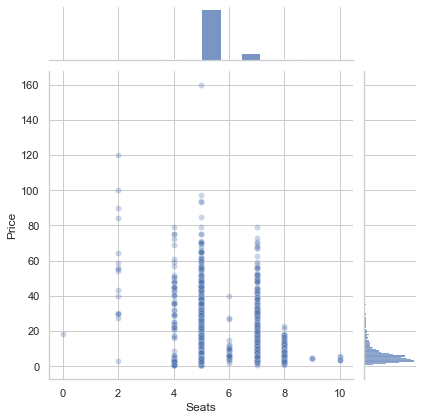

In [66]:
sns.set_style("whitegrid")
sns.jointplot('Seats', 'Price', data = training_data, alpha = 0.3)

C:\Users\Abhishek Nagrecha\anaconda3\lib\site-packages\seaborn\axisgrid.py:1912: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


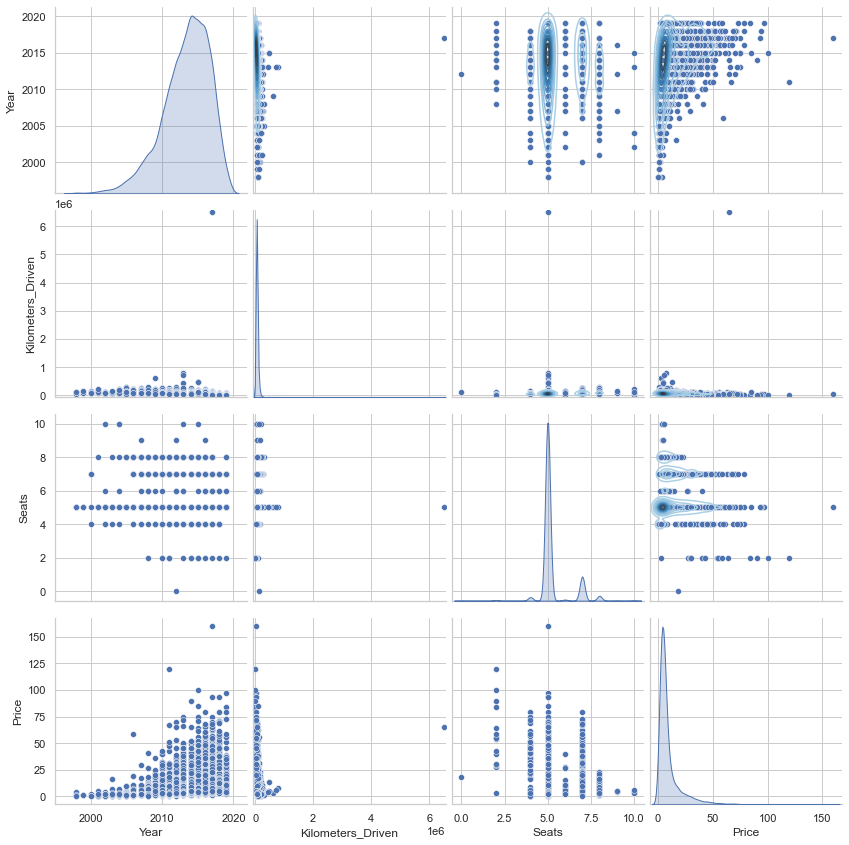

In [77]:
num_cols = ["Year", "Kilometers_Driven","Transmission", "Seats", "Price", "Fuel_Type"] 
sns.pairplot(training_data[num_cols], palette="Set2", diag_kind="kde", size=3).map_upper(sns.kdeplot, cmap="Blues_d")

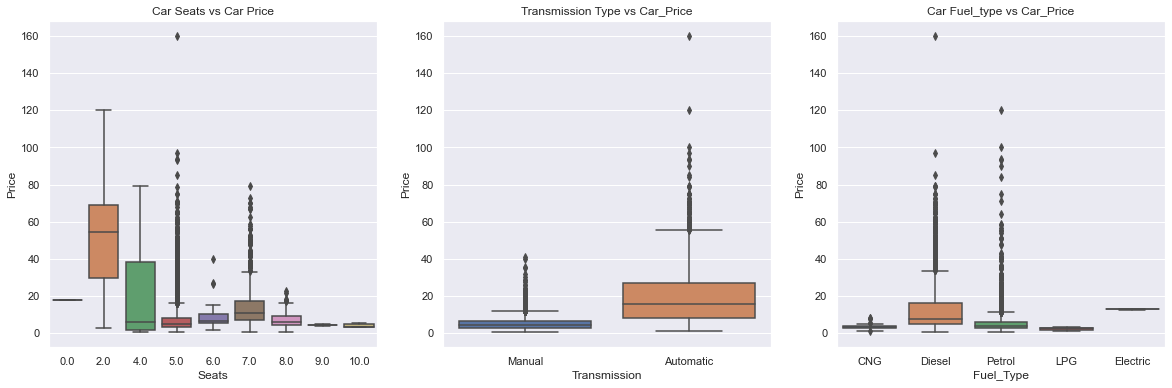

In [19]:
fig = plt.figure(figsize=(20,6))
ax1 = fig.add_subplot(1,3,1)
sns.boxplot(x='Seats', y='Price', data=training_data)
ax1.set_title('Car Seats vs Car Price')

ax2 = fig.add_subplot(1,3,2)
sns.boxplot(x='Transmission', y='Price', data=training_data)
ax2.set_title('Transmission Type vs Car_Price')

ax3 = fig.add_subplot(1,3,3)
sns.boxplot(x='Fuel_Type', y='Price', data=training_data)
ax3.set_title('Car Fuel_type vs Car_Price')

plt.show()

In [20]:
    training_data.at[i, 'Company'] = training_data['Name'][i].split()[0]
    training_data.at[i, 'Mileage(km/kg)'] = training_data['Mileage'][i].split()[0]
    training_data.at[i, 'Engine(CC)'] = training_data['Engine'][i].split()[0]
    training_data.at[i, 'Power(bhp)'] = training_data['Power'][i].split()[0]

In [21]:
training_data['Mileage(km/kg)'] = training_data['Mileage(km/kg)'].astype(float)
training_data['Engine(CC)'] = training_data['Engine(CC)'].astype(float)

In [22]:
training_data['Power'][76]


'null bhp'

In [23]:
x = 'n'
count = 0
position = []
for i in range(training_data.shape[0]):
    if training_data['Power(bhp)'][i]=='null':
        x = 'Y'
        count = count + 1
        position.append(i)
print(x)
print(count)
print(position)

n
0
[]


In [24]:
training_data = training_data.drop(training_data.index[position])
training_data = training_data.reset_index(drop=True)
training_data.shape


(6019, 17)

In [25]:
training_data['Power(bhp)'] = training_data['Power(bhp)'].astype(float)
training_data.head()


,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Company,Mileage(km/kg),Engine(CC),Power(bhp)
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75,Maruti,NaN,NaN,NaN
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50,Hyundai,NaN,NaN,NaN
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50,Honda,NaN,NaN,NaN
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00,Maruti,NaN,NaN,NaN
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74,Audi,NaN,NaN,NaN


In [26]:
for i in range(training_data.shape[0]):
    if pd.isnull(training_data.loc[i,'New_Price']) == False:
        training_data.at[i,'New_car_Price'] = training_data['New_Price'][i].split()[0]
        

In [27]:
training_data['New_car_Price'] = training_data['New_car_Price'].astype(float)


In [28]:
training_data.drop(["Name"],axis=1,inplace=True)
training_data.drop(["Mileage"],axis=1,inplace=True)
training_data.drop(["Engine"],axis=1,inplace=True)
training_data.drop(["Power"],axis=1,inplace=True)
training_data.drop(["New_Price"],axis=1,inplace=True)

# LABEL AND ONE HOT ENCODING

In [29]:
var = 'Location'
training_data[var].value_counts()

Mumbai        790
Hyderabad     742
Kochi         651
Coimbatore    636
Pune          622
Delhi         554
Kolkata       535
Chennai       494
Jaipur        413
Bangalore     358
Ahmedabad     224
Name: Location, dtype: int64

In [30]:
#Now one-hot-encoding the variable location
Location = training_data[[var]]
Location = pd.get_dummies(Location,drop_first=True)
Location.head()

,Location_Bangalore,Location_Chennai,Location_Coimbatore,Location_Delhi,Location_Hyderabad,Location_Jaipur,Location_Kochi,Location_Kolkata,Location_Mumbai,Location_Pune
0,0,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,0,0,0,0,1
2,0,1,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0


In [31]:
var = 'Fuel_Type'
training_data[var].value_counts()

Diesel      3205
Petrol      2746
CNG           56
LPG           10
Electric       2
Name: Fuel_Type, dtype: int64

In [32]:
#Now one-hot-encoding the variable Fuel_type
Fuel_type = training_data[[var]]
Fuel_type = pd.get_dummies(Fuel_type,drop_first=True)
Fuel_type.head()

,Fuel_Type_Diesel,Fuel_Type_Electric,Fuel_Type_LPG,Fuel_Type_Petrol
0,0,0,0,0
1,1,0,0,0
2,0,0,0,1
3,1,0,0,0
4,1,0,0,0


In [33]:
var = 'Transmission'
training_data[var].value_counts()

Manual       4299
Automatic    1720
Name: Transmission, dtype: int64

In [34]:
#Now one-hot-encoding the variable Fuel_type

Transmission = training_data[[var]]
Transmission = pd.get_dummies(Transmission,drop_first=True)
Transmission.head()

,Transmission_Manual
0,1
1,1
2,1
3,1
4,0


In [35]:
var = 'Owner_Type'
training_data[var].value_counts()

First             4929
Second             968
Third              113
Fourth & Above       9
Name: Owner_Type, dtype: int64

In [36]:
#Label encoded this as it had ordered data
training_data.replace({"First":1,"Second":2,"Third": 3,"Fourth & Above":4},inplace=True)
training_data.head()

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Seats,Price,Company,Mileage(km/kg),Engine(CC),Power(bhp),New_car_Price
0,Mumbai,2010,72000,CNG,Manual,1,5.0,1.75,Maruti,NaN,NaN,NaN,NaN
1,Pune,2015,41000,Diesel,Manual,1,5.0,12.50,Hyundai,NaN,NaN,NaN,NaN
2,Chennai,2011,46000,Petrol,Manual,1,5.0,4.50,Honda,NaN,NaN,NaN,8.61
3,Chennai,2012,87000,Diesel,Manual,1,7.0,6.00,Maruti,NaN,NaN,NaN,NaN
4,Coimbatore,2013,40670,Diesel,Automatic,2,5.0,17.74,Audi,NaN,NaN,NaN,NaN


In [37]:
var = 'Company'
training_data[var].value_counts()

Maruti           1211
Hyundai          1107
Honda             608
Toyota            411
Mercedes-Benz     318
Volkswagen        315
Ford              300
Mahindra          272
BMW               267
Audi              236
Tata              186
Skoda             173
Renault           145
Chevrolet         121
Nissan             91
Land               60
Jaguar             40
Fiat               28
Mitsubishi         27
Mini               26
Volvo              21
Porsche            18
Jeep               15
Datsun             13
Force               3
ISUZU               2
Smart               1
Lamborghini         1
Isuzu               1
Bentley             1
Ambassador          1
Name: Company, dtype: int64

In [38]:
final_train= pd.concat([training_data,Location,Fuel_type,Transmission],axis=1)
final_train.head()

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Seats,Price,Company,Mileage(km/kg),...,Location_Jaipur,Location_Kochi,Location_Kolkata,Location_Mumbai,Location_Pune,Fuel_Type_Diesel,Fuel_Type_Electric,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Manual
0,Mumbai,2010,72000,CNG,Manual,1,5.0,1.75,Maruti,NaN,...,0,0,0,1,0,0,0,0,0,1
1,Pune,2015,41000,Diesel,Manual,1,5.0,12.50,Hyundai,NaN,...,0,0,0,0,1,1,0,0,0,1
2,Chennai,2011,46000,Petrol,Manual,1,5.0,4.50,Honda,NaN,...,0,0,0,0,0,0,0,0,1,1
3,Chennai,2012,87000,Diesel,Manual,1,7.0,6.00,Maruti,NaN,...,0,0,0,0,0,1,0,0,0,1
4,Coimbatore,2013,40670,Diesel,Automatic,2,5.0,17.74,Audi,NaN,...,0,0,0,0,0,1,0,0,0,0


In [91]:
final_train= pd.concat([training_data,Location,Fuel_type,Transmission],axis=1)
final_train.head()

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Seats,Price,Mileage(km/kg),Engine(CC),...,Location_Jaipur,Location_Kochi,Location_Kolkata,Location_Mumbai,Location_Pune,Fuel_Type_Diesel,Fuel_Type_Electric,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Manual
0,Mumbai,2010,72000,CNG,Manual,1,5.0,1.75,NaN,NaN,...,0,0,0,1,0,0,0,0,0,1
1,Pune,2015,41000,Diesel,Manual,1,5.0,12.50,NaN,NaN,...,0,0,0,0,1,1,0,0,0,1
2,Chennai,2011,46000,Petrol,Manual,1,5.0,4.50,NaN,NaN,...,0,0,0,0,0,0,0,0,1,1
3,Chennai,2012,87000,Diesel,Manual,1,7.0,6.00,NaN,NaN,...,0,0,0,0,0,1,0,0,0,1
4,Coimbatore,2013,40670,Diesel,Automatic,2,5.0,17.74,NaN,NaN,...,0,0,0,0,0,1,0,0,0,0


In [92]:
final_train.shape

(6019, 27)

In [ ]:
#Now here I have droppped ess important features from the dataset
final_train.drop(["Location","Fuel_Type","Transmission","New_car_Price"],axis=1,inplace=True)
final_train.head() 

In [ ]:
final_train.shape

# Now working on our testing_data to apply the ML algorithms

In [ ]:
testing_data.head()

In [94]:
testing_data = testing_data.iloc[:,1:]

print("Shape of test data Before dropping any Row: ",testing_data.shape)
testing_data = testing_data[testing_data['Mileage'].notna()]
print("Shape of test data After dropping Rows with NULL values in Mileage: ",testing_data.shape)
testing_data = testing_data[testing_data['Engine'].notna()]
print("Shape of test data After dropping Rows with NULL values in Engine : ",testing_data.shape)
testing_data = testing_data[testing_data['Power'].notna()]
print("Shape of test data After dropping Rows with NULL values in Power  : ",testing_data.shape)
testing_data = testing_data[testing_data['Seats'].notna()]
print("Shape of test data After dropping Rows with NULL values in Seats  : ",testing_data.shape)
print('Droping null done')

testing_data = testing_data.reset_index(drop=True)
print('Index reset done')

for i in range(testing_data.shape[0]):
    testing_data.at[i, 'Mileage(km/kg)'] = testing_data['Mileage'][i].split()[0]
    testing_data.at[i, 'Engine(CC)'] = testing_data['Engine'][i].split()[0]
    testing_data.at[i, 'Power(bhp)'] = testing_data['Power'][i].split()[0]
print('Split Done') 

testing_data['Mileage(km/kg)'] = testing_data['Mileage(km/kg)'].astype(float)
testing_data['Engine(CC)'] = testing_data['Engine(CC)'].astype(float)
print('casting 1 Done') 

position = []
for i in range(testing_data.shape[0]):
    if testing_data['Power(bhp)'][i]=='null':
        position.append(i)
        
testing_data = testing_data.drop(testing_data.index[position])
testing_data = testing_data.reset_index(drop=True) 

testing_data['Power(bhp)'] = testing_data['Power(bhp)'].astype(float)
print('casting 2 Done') 


for i in range(testing_data.shape[0]):
    if pd.isnull(testing_data.loc[i,'New_Price']) == False:
        testing_data.at[i,'New_car_Price'] = testing_data['New_Price'][i].split()[0]

testing_data['New_car_Price'] = testing_data['New_car_Price'].astype(float)
testing_data.drop(["Name"],axis=1,inplace=True)
testing_data.drop(["Mileage"],axis=1,inplace=True)
testing_data.drop(["Engine"],axis=1,inplace=True)
testing_data.drop(["Power"],axis=1,inplace=True)
testing_data.drop(["New_Price"],axis=1,inplace=True)

var = 'Location'
Location = testing_data[[var]]
Location = pd.get_dummies(Location,drop_first=True)
Location.head()

var = 'Fuel_Type'
Fuel_t = testing_data[[var]]
Fuel_t = pd.get_dummies(Fuel_t,drop_first=True)
Fuel_t.head()

var = 'Transmission'
Transmission = testing_data[[var]]
Transmission = pd.get_dummies(Transmission,drop_first=True)
Transmission.head()

testing_data.replace({"First":1,"Second":2,"Third": 3,"Fourth & Above":4},inplace=True)
testing_data.head()

final_test= pd.concat([testing_data,Location,Fuel_t,Transmission],axis=1)
final_test.head()

final_test.drop(["Location","Fuel_Type","Transmission","New_car_Price"],axis=1,inplace=True)
final_test.head()

print("Final Test Size: ",final_test.shape)


Shape of test data Before dropping any Row:  (1234, 12)
Shape of test data After dropping Rows with NULL values in Mileage:  (1234, 12)
Shape of test data After dropping Rows with NULL values in Engine :  (1224, 12)
Shape of test data After dropping Rows with NULL values in Power  :  (1224, 12)
Shape of test data After dropping Rows with NULL values in Seats  :  (1223, 12)
Droping null done
Index reset done
Split Done
casting 1 Done
casting 2 Done
Final Test Size:  (1201, 21)


# Now selection the final features from the dataset

In [79]:
final_train.columns


Index(['Location', 'Year', 'Kilometers_Driven', 'Fuel_Type', 'Transmission',
       'Owner_Type', 'Seats', 'Price', 'Company', 'Mileage(km/kg)',
       'Engine(CC)', 'Power(bhp)', 'New_car_Price', 'Location_Bangalore',
       'Location_Chennai', 'Location_Coimbatore', 'Location_Delhi',
       'Location_Hyderabad', 'Location_Jaipur', 'Location_Kochi',
       'Location_Kolkata', 'Location_Mumbai', 'Location_Pune',
       'Fuel_Type_Diesel', 'Fuel_Type_Electric', 'Fuel_Type_LPG',
       'Fuel_Type_Petrol', 'Transmission_Manual'],
      dtype='object')

In [80]:
X = final_train.loc[:,['Year', 'Kilometers_Driven', 'Owner_Type', 'Seats',
       'Mileage(km/kg)', 'Engine(CC)', 'Power(bhp)', 
       'Location_Bangalore', 'Location_Chennai', 'Location_Coimbatore',
       'Location_Delhi', 'Location_Hyderabad', 'Location_Jaipur',
       'Location_Kochi', 'Location_Kolkata', 'Location_Mumbai',
       'Location_Pune', 'Fuel_Type_Diesel', 'Fuel_Type_LPG',
       'Fuel_Type_Petrol', 'Transmission_Manual']]
X.shape

(6019, 21)

In [81]:
y = final_train.loc[:,['Price']]
y.head(10)

,Price
0,1.75
1,12.50
2,4.50
3,6.00
4,17.74
5,2.35
6,3.50
7,17.50
8,5.20
9,1.95


In [86]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 25)



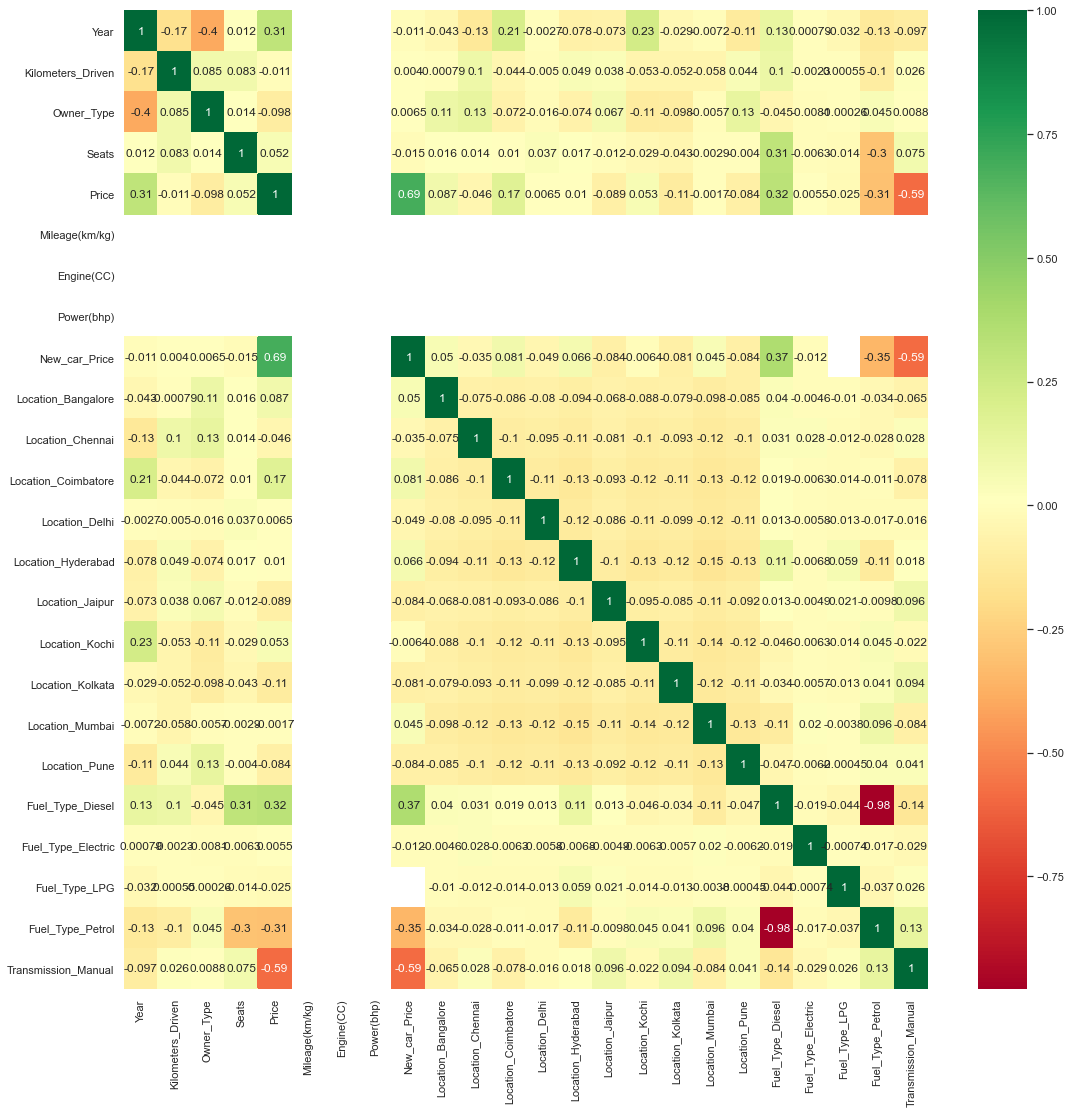

In [87]:
plt.figure(figsize=(18,18))
sns.heatmap(final_train.corr(),annot=True,cmap='RdYlGn')

plt.show()